In [1]:
import numpy

In [23]:
conda install -c conda-forge deepxde


Note: you may need to restart the kernel to use updated packages.


In [1]:
import deepxde as dde
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import pandas as pd

Using backend: paddle
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, jax.
paddle supports more examples now and is recommended.


RuntimeError: DeepXDE requires PaddlePaddle==0.0.0(develop).

In [2]:
dde.config.set_random_seed(1234)
dde.config.set_default_float("float64")

Set the default float type to float64


In [3]:
#computational domain
geom = dde.geometry.Rectangle([0, 0], [1, 1])

In [4]:
#pde
def pde(x, u):
    u_xx = dde.grad.hessian(u, x, i=0, j=0)
    u_yy = dde.grad.hessian(u, x, i=1, j=1)
    return u_xx + u_yy

## Hard Constraints

In [5]:
def output_transform1(x,u):
    A = x[:,1:2] * (tf.sin(tf.constant(np.pi, dtype=tf.float64)*x[:,0:1]) - x[:,0:1] * tf.sin(tf.constant(np.pi, dtype=tf.float64)) )
    return A + x[:,0:1] * (1-x[:,0:1]) * x[:,1:2] * (1-x[:,1:2]) * u

In [6]:
data_500 = dde.data.TimePDE(geom, 
                        pde, 
                         [],
                        num_domain=500,
                        train_distribution='Sobol')

C:\anaconda\Lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+501=501. 
  warnings.warn("The balance properties of Sobol' points require "


In [7]:
net_10 = dde.nn.FNN([2] + [10] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_20 = dde.nn.FNN([2] + [20] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_30 = dde.nn.FNN([2] + [30] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_40 = dde.nn.FNN([2] + [40] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_50 = dde.nn.FNN([2] + [50] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_60 = dde.nn.FNN([2] + [60] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_70 = dde.nn.FNN([2] + [70] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))
net_80 = dde.nn.FNN([2] + [80] * 5 + [1], "tanh", tf.keras.initializers.GlorotUniform(seed=1234))

In [8]:
net_10.apply_output_transform(output_transform1)
net_20.apply_output_transform(output_transform1)
net_30.apply_output_transform(output_transform1)
net_40.apply_output_transform(output_transform1)
net_50.apply_output_transform(output_transform1)
net_60.apply_output_transform(output_transform1)
net_70.apply_output_transform(output_transform1)
net_80.apply_output_transform(output_transform1)

In [9]:
model_10 = dde.Model(data_500, net_10)
model_20 = dde.Model(data_500, net_20)
model_30 = dde.Model(data_500, net_30)
model_40 = dde.Model(data_500, net_40)
model_50 = dde.Model(data_500, net_50)
model_60 = dde.Model(data_500, net_60)
model_70 = dde.Model(data_500, net_70)
model_80 = dde.Model(data_500, net_80)

## Training

In [10]:
dde.optimizers.config.set_LBFGS_options(maxiter=15000, maxfun=15000)

In [11]:
model_10.compile("adam", lr=0.001)
model_10.train(iterations=10000)
model_10.compile("L-BFGS-B")
model_10.train(iterations=15000)

Compiling model...
Building feed-forward neural network...


C:\anaconda\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(



'build' took 0.507936 s


'compile' took 4.323559 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.64e+01]    [1.64e+01]    []  
1000      [3.79e-02]    [3.79e-02]    []  
2000      [2.94e-03]    [2.94e-03]    []  
3000      [9.53e-04]    [9.53e-04]    []  
4000      [3.23e-04]    [3.23e-04]    []  
5000      [1.23e-04]    [1.23e-04]    []  
6000      [6.61e-05]    [6.61e-05]    []  
7000      [4.12e-05]    [4.12e-05]    []  
8000      [2.71e-05]    [2.71e-05]    []  
9000      [7.83e-05]    [7.83e-05]    []  
10000     [1.84e-05]    [1.84e-05]    []  

Best model at step 10000:
  train loss: 1.84e-05
  test loss: 1.84e-05
  test metric: []

'train' took 43.122492 s

Compiling model...
'compile' took 1.304331 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.84e-05]    [1.84e-05]    []  
11000     [2.06e-07]    [2.06e-07]        
12000     [7.57e-08]    [7.57e-08]        
13000     [4.55e-08]    [4.55e-08]        


(<deepxde.model.LossHistory at 0x1ef0d2b5b50>,
 <deepxde.model.TrainState at 0x1ef0c0e3790>)

In [12]:
model_20.compile("adam", lr=0.001)
model_20.train(iterations=10000)
model_20.compile("L-BFGS-B")
model_20.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.251312 s

'compile' took 3.758839 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.52e+01]    [1.52e+01]    []  
1000      [4.50e-03]    [4.50e-03]    []  
2000      [6.14e-04]    [6.14e-04]    []  
3000      [2.15e-04]    [2.15e-04]    []  
4000      [1.06e-04]    [1.06e-04]    []  
5000      [6.10e-05]    [6.10e-05]    []  
6000      [3.91e-05]    [3.91e-05]    []  
7000      [5.14e-03]    [5.14e-03]    []  
8000      [2.84e-05]    [2.84e-05]    []  
9000      [5.17e-05]    [5.17e-05]    []  
10000     [1.29e-05]    [1.29e-05]    []  

Best model at step 10000:
  train loss: 1.29e-05
  test loss: 1.29e-05
  test metric: []

'train' took 67.108103 s

Compiling model...
'compile' took 0.729649 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.29e-05]    [1.29e-05]    []  
11000     [1.71e-07]    [1.71e-07]        
12000     [5.34e-08]    [5.34

(<deepxde.model.LossHistory at 0x1ef0d29f510>,
 <deepxde.model.TrainState at 0x1ef0d29f210>)

In [13]:
model_30.compile("adam", lr=0.001)
model_30.train(iterations=10000)
model_30.compile("L-BFGS-B")
model_30.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.126610 s

'compile' took 1.761891 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.73e+01]    [1.73e+01]    []  
1000      [5.23e-04]    [5.23e-04]    []  
2000      [1.30e-04]    [1.30e-04]    []  
3000      [5.78e-05]    [5.78e-05]    []  
4000      [5.21e-05]    [5.21e-05]    []  
5000      [2.23e-05]    [2.23e-05]    []  
6000      [1.62e-05]    [1.62e-05]    []  
7000      [7.90e-04]    [7.90e-04]    []  
8000      [2.66e-05]    [2.66e-05]    []  
9000      [9.98e-06]    [9.98e-06]    []  
10000     [8.55e-06]    [8.55e-06]    []  

Best model at step 10000:
  train loss: 8.55e-06
  test loss: 8.55e-06
  test metric: []

'train' took 101.187154 s

Compiling model...
'compile' took 2.974997 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [8.55e-06]    [8.55e-06]    []  
11000     [1.95e-07]    [1.95e-07]        
12000     [6.52e-08]    [6.5

(<deepxde.model.LossHistory at 0x1ef0d29f190>,
 <deepxde.model.TrainState at 0x1ef0d29d450>)

In [14]:
model_40.compile("adam", lr=0.001)
model_40.train(iterations=10000)
model_40.compile("L-BFGS-B")
model_40.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.278332 s

'compile' took 3.821938 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.60e+01]    [1.60e+01]    []  
1000      [4.09e-04]    [4.09e-04]    []  
2000      [8.88e-05]    [8.88e-05]    []  
3000      [6.81e-05]    [6.81e-05]    []  
4000      [1.56e-05]    [1.56e-05]    []  
5000      [2.85e-05]    [2.85e-05]    []  
6000      [8.94e-06]    [8.94e-06]    []  
7000      [6.54e-06]    [6.54e-06]    []  
8000      [2.55e-05]    [2.55e-05]    []  
9000      [7.59e-04]    [7.59e-04]    []  
10000     [5.28e-06]    [5.28e-06]    []  

Best model at step 10000:
  train loss: 5.28e-06
  test loss: 5.28e-06
  test metric: []

'train' took 137.022522 s

Compiling model...
'compile' took 2.084176 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [5.28e-06]    [5.28e-06]    []  
11000     [8.10e-08]    [8.10e-08]        
12000     [1.52e-08]    [1.5

(<deepxde.model.LossHistory at 0x1ef0d29f3d0>,
 <deepxde.model.TrainState at 0x1ef0d29f0d0>)

In [15]:
model_50.compile("adam", lr=0.001)
model_50.train(iterations=10000)
model_50.compile("L-BFGS-B")
model_50.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.321450 s

'compile' took 3.212885 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.63e+01]    [1.63e+01]    []  
1000      [2.08e-04]    [2.08e-04]    []  
2000      [5.56e-05]    [5.56e-05]    []  
3000      [2.88e-05]    [2.88e-05]    []  
4000      [1.96e-05]    [1.96e-05]    []  
5000      [1.21e-05]    [1.21e-05]    []  
6000      [4.53e-03]    [4.53e-03]    []  
7000      [6.53e-06]    [6.53e-06]    []  
8000      [4.74e-06]    [4.74e-06]    []  
9000      [1.89e-05]    [1.89e-05]    []  
10000     [5.59e-06]    [5.59e-06]    []  

Best model at step 8000:
  train loss: 4.74e-06
  test loss: 4.74e-06
  test metric: []

'train' took 167.714921 s

Compiling model...
'compile' took 1.887618 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [5.59e-06]    [5.59e-06]    []  
11000     [4.69e-08]    [4.69e-08]        
12000     [1.07e-08]    [1.07

(<deepxde.model.LossHistory at 0x1ef0d29f250>,
 <deepxde.model.TrainState at 0x1ef0d29f290>)

In [16]:
model_60.compile("adam", lr=0.001)
model_60.train(iterations=10000)
model_60.compile("L-BFGS-B")
model_60.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.277815 s

'compile' took 6.312399 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.69e+01]    [1.69e+01]    []  
1000      [2.31e-04]    [2.31e-04]    []  
2000      [2.90e-05]    [2.90e-05]    []  
3000      [1.43e-05]    [1.43e-05]    []  
4000      [9.66e-06]    [9.66e-06]    []  
5000      [6.77e-06]    [6.77e-06]    []  
6000      [1.05e-04]    [1.05e-04]    []  
7000      [4.83e-06]    [4.83e-06]    []  
8000      [5.14e-06]    [5.14e-06]    []  
9000      [1.23e-03]    [1.23e-03]    []  
10000     [1.49e-05]    [1.49e-05]    []  

Best model at step 7000:
  train loss: 4.83e-06
  test loss: 4.83e-06
  test metric: []

'train' took 235.405912 s

Compiling model...
'compile' took 2.367446 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [1.49e-05]    [1.49e-05]    []  
11000     [2.62e-08]    [2.62e-08]        
12000     [5.97e-09]    [5.97

(<deepxde.model.LossHistory at 0x1ef0d29f7d0>,
 <deepxde.model.TrainState at 0x1ef0d29f650>)

In [17]:
model_70.compile("adam", lr=0.001)
model_70.train(iterations=10000)
model_70.compile("L-BFGS-B")
model_70.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.290631 s

'compile' took 4.297519 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.54e+01]    [1.54e+01]    []  
1000      [6.57e-05]    [6.57e-05]    []  
2000      [3.17e-05]    [3.17e-05]    []  
3000      [2.65e-05]    [2.65e-05]    []  
4000      [2.09e-05]    [2.09e-05]    []  
5000      [2.02e-04]    [2.02e-04]    []  
6000      [1.76e-05]    [1.76e-05]    []  
7000      [1.43e-03]    [1.43e-03]    []  
8000      [1.88e-05]    [1.88e-05]    []  
9000      [6.28e-06]    [6.28e-06]    []  
10000     [9.27e-04]    [9.27e-04]    []  

Best model at step 9000:
  train loss: 6.28e-06
  test loss: 6.28e-06
  test metric: []

'train' took 250.283123 s

Compiling model...
'compile' took 3.540205 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [9.27e-04]    [9.27e-04]    []  
11000     [3.19e-08]    [3.19e-08]        
12000     [1.43e-08]    [1.43

(<deepxde.model.LossHistory at 0x1ef0d29fc90>,
 <deepxde.model.TrainState at 0x1ef0d29fdd0>)

In [18]:
model_80.compile("adam", lr=0.001)
model_80.train(iterations=10000)
model_80.compile("L-BFGS-B")
model_80.train(iterations=15000)

Compiling model...
Building feed-forward neural network...
'build' took 0.445569 s

'compile' took 4.151926 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.73e+01]    [1.73e+01]    []  
1000      [1.48e-04]    [1.48e-04]    []  
2000      [3.85e-05]    [3.85e-05]    []  
3000      [2.13e-04]    [2.13e-04]    []  
4000      [1.72e-05]    [1.72e-05]    []  
5000      [4.25e-04]    [4.25e-04]    []  
6000      [1.42e-03]    [1.42e-03]    []  
7000      [8.49e-06]    [8.49e-06]    []  
8000      [5.89e-04]    [5.89e-04]    []  
9000      [7.35e-05]    [7.35e-05]    []  
10000     [3.79e-06]    [3.79e-06]    []  

Best model at step 10000:
  train loss: 3.79e-06
  test loss: 3.79e-06
  test metric: []

'train' took 304.526065 s

Compiling model...
'compile' took 2.960498 s

Training model...

Step      Train loss    Test loss     Test metric
10000     [3.79e-06]    [3.79e-06]    []  
11000     [1.53e-08]    [1.53e-08]        
12000     [3.97e-09]    [3.9

(<deepxde.model.LossHistory at 0x1ef0d29f150>,
 <deepxde.model.TrainState at 0x1ef0d29f710>)

## Error

In [20]:
def u(x, y): 
    return (np.sinh(np.pi*y)/np.sinh(np.pi))*np.sin(np.pi*x)

In [21]:
u_exact500 = u(data_500.train_x_all.T[0],
                 data_500.train_x_all.T[1])

In [22]:
u_10 = model_10.predict(data_500.train_x_all)
u_20 = model_20.predict(data_500.train_x_all)
u_30 = model_30.predict(data_500.train_x_all)
u_40 = model_40.predict(data_500.train_x_all)
u_50 = model_50.predict(data_500.train_x_all)
u_60 = model_60.predict(data_500.train_x_all)
u_70 = model_70.predict(data_500.train_x_all)
u_80 = model_80.predict(data_500.train_x_all)

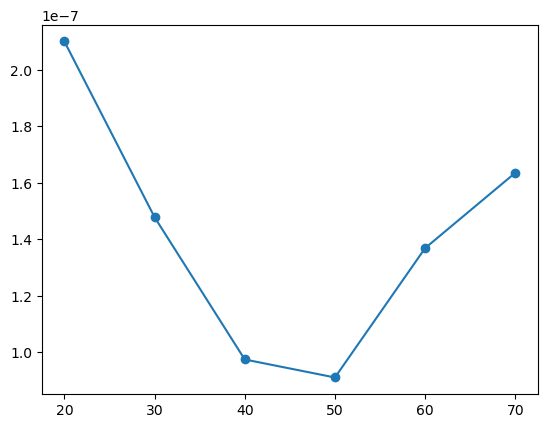

In [26]:
l2_10 = dde.metrics.l2_relative_error(u_exact500, u_10.T)
l2_20 = dde.metrics.l2_relative_error(u_exact500, u_20.T)
l2_30 = dde.metrics.l2_relative_error(u_exact500, u_30.T)
l2_40 = dde.metrics.l2_relative_error(u_exact500, u_40.T)
l2_50 = dde.metrics.l2_relative_error(u_exact500, u_50.T)
l2_60 = dde.metrics.l2_relative_error(u_exact500, u_60.T)
l2_70 = dde.metrics.l2_relative_error(u_exact500, u_70.T)
l2_80 = dde.metrics.l2_relative_error(u_exact500, u_80.T)

plt.scatter([20,30,40,50,60,70],[l2_20,l2_30,l2_40,l2_50,l2_60,l2_70])
plt.plot([20,30,40,50,60,70],[l2_20,l2_30,l2_40,l2_50,l2_60,l2_70])